Load imports

In [10]:
import pandas as pd
import numpy as np
from models.gan import GAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

Load dataset

In [7]:
df_pokemon= pd.read_csv("data/pokemon_train_set.csv")
df_pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Basic
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Stage1
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Stage2
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Mega
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Basic


Preprocessing

In [8]:
df_pokemon = df_pokemon.drop(columns=['Name'], axis=1)
numerical_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
scaler = StandardScaler()
df_pokemon[numerical_cols] = scaler.fit_transform(df_pokemon[numerical_cols])

df_pokemon['Type 2'] = df_pokemon['Type 2'].fillna('None')
df_pokemon = pd.get_dummies(df_pokemon, columns=['Type 1', 'Type 2', 'Generation', 'Evolution'])

bool_cols = df_pokemon.select_dtypes(include=['bool']).columns
df_pokemon[bool_cols] = df_pokemon[bool_cols].astype(int)
column_names = df_pokemon.columns
df_pokemon.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_)Normal,Type 1_Bug,Type 1_Dark,...,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,Evolution_Basic,Evolution_Mega,Evolution_Stage1,Evolution_Stage2
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Train GAN model

In [11]:
noise = np.random.normal(0, 1, df_pokemon.shape) 
gan = GAN(data=df_pokemon, noise_dim=100, epochs=150, batch_size=32)
generator = gan.create_generator()
discriminator = gan.create_discriminator()
gan_model = gan.compile(generator=generator, discriminator=discriminator)
trained_generator, d_losses, g_losses = gan.train(generator, discriminator, gan_model)

c:\Users\Lisa\anaconda3\envs\FH2\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
>1, d_loss=0.663, g_loss=0.661
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
>2, d_loss=0.660, g_loss=0.601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
>3, d_loss=0.654, g_loss=0.563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
>4, d_loss=0.677, g_loss=0.513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
>5, d_loss=0.684, g_loss=0.483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
>6, d_loss=0.702, g_loss=0.465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
>7, d_loss=0.726, g_loss=0.445
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
>8, d_loss=0.743, g_loss=0.422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>9, d_loss=0.767, g_loss=0.400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
>10, d_loss=0.792, g_loss=0.382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
>11, d_loss=0.814, g_loss=0.369
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>12, d_loss=0.834, g_loss=0.356
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
>13, d_loss=0.866, g_loss=0.344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>14, d_loss=0.887, g_loss=0.335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

Get predicitions of GAN model

In [28]:
generate_num = 200
noise = np.random.normal(0, 1, (generate_num, 100))
predicted_data = trained_generator.predict(noise)
predicted_df = pd.DataFrame(predicted_data, columns=column_names)
predicted_df.head(10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_)Normal,Type 1_Bug,Type 1_Dark,...,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,Evolution_Basic,Evolution_Mega,Evolution_Stage1,Evolution_Stage2
0,-0.678573,0.999991,-0.999996,0.999121,0.985273,0.999925,0.999990,0.998241,0.991824,-0.957157,...,-0.813520,-0.999939,0.998732,-0.945014,0.972132,0.998714,-0.418791,0.999999,0.931315,0.530092
1,0.999805,-0.734702,0.999973,0.463698,0.082373,-0.999968,-0.095997,0.935001,-0.950843,0.996609,...,0.999972,-0.786661,0.999905,-0.999928,-0.325693,-0.999996,0.999538,-0.929833,0.963234,-0.915297
2,-0.506945,0.999985,-0.999870,0.999994,0.882453,-1.000000,0.999994,0.999671,0.123528,0.009919,...,0.999998,-1.000000,0.999865,-0.999996,0.995954,-0.995729,0.982651,0.935140,-0.998342,0.999835
3,-0.999168,-0.999882,0.875648,0.161225,-0.099508,-0.999967,-0.288422,0.983457,0.999963,-0.998958,...,0.999876,0.999996,0.081406,-0.538567,0.407884,-0.924963,0.997926,-0.912582,0.885688,-0.999805
4,0.920906,0.988954,-0.998583,0.901313,-0.998057,0.952519,0.542239,-0.963229,0.758014,-0.996735,...,-0.599605,-0.999945,0.999987,-0.999979,0.993221,-0.975370,-0.499683,0.999954,0.561403,-0.515220
5,-0.983822,0.999884,-0.999963,0.999999,0.960333,-0.950618,1.000000,0.964041,0.999198,-0.903238,...,0.999704,-0.999624,0.999539,-0.999953,0.997581,-0.999975,0.999894,0.996719,0.784044,0.811732
6,-0.995502,-0.419616,-0.922661,0.969981,0.999663,0.999994,0.999994,0.983644,0.999989,-0.999999,...,-0.975751,0.979003,-0.817537,0.999897,0.999124,-0.999891,0.192000,0.995622,0.910713,-0.878742
7,-0.972480,-0.999999,0.822632,-0.999946,-1.000000,-0.997933,-0.994554,0.964263,0.998867,-0.627953,...,0.946471,0.622363,0.998501,-0.999510,0.735724,0.999982,0.993143,-0.997730,0.997548,-0.804703
8,0.996069,0.999695,0.994548,-0.999086,-0.997790,-0.125087,-0.999318,-0.285318,-1.000000,1.000000,...,0.997808,-1.000000,0.971907,-0.999897,-0.889156,0.999997,0.998437,-0.999366,0.688517,-0.169043
9,-0.991882,-0.424089,0.909456,-0.992837,0.176066,-0.999985,-0.784477,-0.755494,-0.999927,0.998983,...,-0.158572,-0.823100,0.974172,-0.995763,-0.430439,0.083042,0.988903,-0.999363,0.980560,0.518574


Transform prediction to human readable output

In [29]:
def make_binary_attributes_readable(attributes:list) -> pd.DataFrame:
    for attribute in attributes:
        columns = [col for col in predicted_df.columns if attribute in col]

        # Get the column with the highest value for each row among 'Type 1' columns
        max = predicted_df[columns].idxmax(axis=1)

        # Extract the type name from the column names (removing the 'Type 1_' prefix)
        predicted_df[attribute[:-1]] = max.str.replace(attribute, '')

        # Optionally, you can drop the old type columns if they are no longer needed
        predicted_df.drop(columns=columns, inplace=True)
        predicted_df.head()
    return predicted_df

In [30]:
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
make_readble_cols= ["Generation_", "Type 1_", "Type 2_","Evolution_"]
readable_df = make_binary_attributes_readable(make_readble_cols) 
readable_df['Legendary'] = readable_df['Legendary'] > 0.25 
readable_df[numerical_cols] = scaler.inverse_transform(readable_df[numerical_cols])
readable_df = readable_df.round(0)
readable_df['Total'] = readable_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
pd.DataFrame.to_csv(readable_df, path_or_buf=f'models/evaluation/data/GAN_generated_data{timestamp}.csv')
readable_df.head(10)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation,Type 1,Type 2,Evolution,Total
0,52.0,111.0,43.0,105.0,99.0,97.0,True,3,Normal,Electric,Mega,507.0
1,95.0,55.0,105.0,88.0,74.0,39.0,False,1,Grass,Fairy,Basic,456.0
2,56.0,111.0,43.0,106.0,96.0,39.0,True,1,Grass,Ground,Stage2,451.0
3,44.0,47.0,101.0,78.0,69.0,39.0,False,2,Bug,Normal,Basic,378.0
4,93.0,111.0,43.0,102.0,44.0,96.0,True,3,Poison,Bug,Mega,489.0
5,44.0,111.0,43.0,106.0,99.0,41.0,True,1,Rock,Ground,Basic,444.0
6,44.0,65.0,45.0,105.0,100.0,97.0,True,4,Bug,Ghost,Mega,456.0
7,44.0,47.0,99.0,40.0,44.0,39.0,False,6,Ghost,Dragon,Stage1,313.0
8,95.0,111.0,105.0,40.0,44.0,65.0,False,6,Dark,Dark,Basic,460.0
9,44.0,65.0,102.0,40.0,77.0,39.0,False,3,Ghost,Steel,Basic,367.0


Evaluate GAN

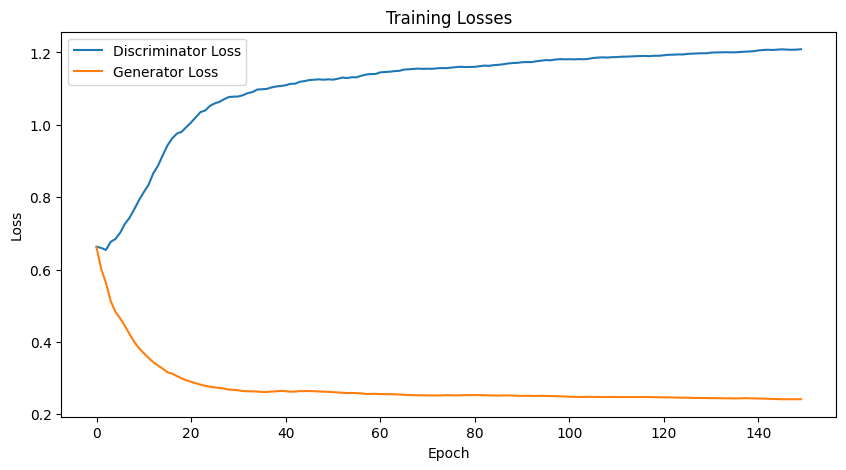

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'models/evaluation/plots/GAN_Training_Losses{timestamp}.png')
plt.show()

In [32]:
readable_df.to_csv("TF_Pokemon.csv", index=False, encoding="UTF-8")

In [9]:
#TODO: Evaluate Model